In [1]:
import numpy as np

N = 27007 # number of samples to generate; the actual size may be smaller because of the prior
D = 48 # number of dims
a = 5.
lower = np.full(D, -100.) # lower bound of the prior
upper = np.full(D, 100.) # upper bound of the prior
bound = np.array((lower, upper)).T
diff = bound[:, 1] - bound[:, 0]
const = np.sum(np.log(diff)) # normalization of the flat prior


def logp(x):
    _a = 1 / ((x + a)**2 + 1)
    _b = 1 / ((x - a)**2 + 1)
    return np.sum(np.log(_a + _b), axis=-1) + x.shape[-1] * np.log(0.5 / np.pi) - const

def grad(x):
    _a = 1 / ((x + a)**2 + 1)
    _b = 1 / ((x - a)**2 + 1)
    return -2 * ((x + a) / ((x + a)**2 + 1)**2 + 
                 (x - a) / ((x - a)**2 + 1)**2) / (_a + _b)

def _in_bound(x, bound):
    xt = np.atleast_2d(x).T
    return np.product([np.where(xi>bound[i,0], True, False) * 
                       np.where(xi<bound[i,1], True, False) for i, xi in 
                       enumerate(xt)], axis=0).astype(bool)

In [2]:
np.random.seed(0)
x = np.random.standard_cauchy((N // 2, D))
_rand = np.random.randint(0, 2, (N // 2, D))
x += -5 + _rand * 10
x = x[_in_bound(x, bound)]
np.save('cauchy_{}.npy'.format(x.shape[0]), x)

Removed no burn in


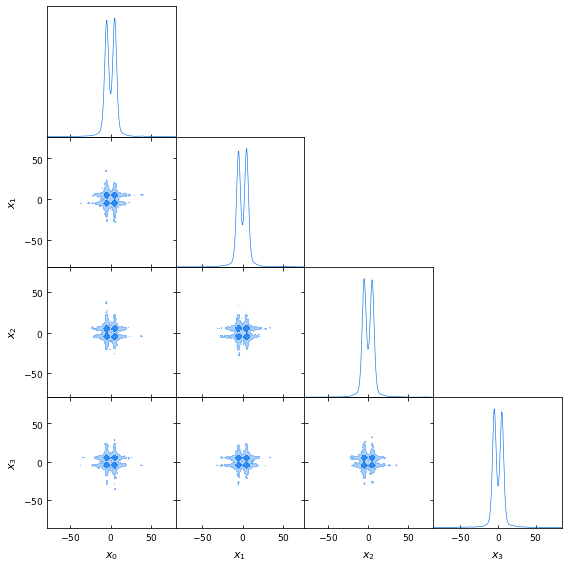

In [4]:
%matplotlib inline
from getdist import plots, MCSamples
import matplotlib.pyplot as plt

names = ["x_%s"%i for i in range(4)]
labels = ["x_%s"%i for i in range(4)]
s = MCSamples(samples=x[:, :4], names=names, labels=labels)
g = plots.getSubplotPlotter()
g.settings.axes_fontsize = 12
g.settings.lab_fontsize = 14
g.triangle_plot([s], filled=True, contour_args={'alpha':0.8})
plt.show()